Final Project - Machine Learning
- Daniel Jönsson & Mustafa Al-Bayati
- Group 10

## Dependencies

In [147]:
%pip install pandas
%pip install matplotlib
%pip install scikit-learn
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Imports

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1. Data Loading

In [149]:
# load the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

# display the shape and info of the dataset, also the first 5 rows
print(f'Dataset shape: {df.shape}')
print(df.info())
df.head()


Dataset shape: (5572, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# 2. Preprocessing & Cleaning

## 2.1 Remove unneccessary columns

In [150]:
# drop unnamed columns  
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

## 2.2 Rename columns

In [151]:
df = df.rename(columns={'v1': 'category', 'v2': 'message'})

df.head()

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 2.3 Check for null values

In [152]:
# check for missing values in each column
df.isnull().sum()

category    0
message     0
dtype: int64

## 2.4 Check for duplicates & drop

In [153]:
# check for duplicate rows
print(df.duplicated().sum())

# remove duplicate rows
df = df.drop_duplicates()

# print duplicates after removal
print(df.duplicated().sum())

403
0


## 2.5 Change target ham/spam to 0 and 1

In [154]:
# use encoding to convert 'ham' to 0 and 'spam' to 1
def encode_category(category):
    if category == 'ham':
        return 0
    else:
        return 1
    
df['category'] = df['category'].apply(encode_category)

## 2.6 Change messages to lowercase

In [155]:
## change all messages to lowercase
df['message'] = df['message'].str.lower()

## 2.7 Display data after cleaning

In [156]:
df

,category,message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...
5568,0,will ì_ b going to esplanade fr home?
5569,0,"pity, * was in mood for that. so...any other s..."
5570,0,the guy did some bitching but i acted like i'd...


In [157]:
# use value_counts to see the distribution of categories
print(df['category'].value_counts())

category
0    4516
1     653
Name: count, dtype: int64


# 3. Feature Engineering

## 3.1 Message Length

In [158]:
# message length
df['message_length'] = df['message'].str.len()

## 3.2 Word Count

In [159]:
# word count
def word_counter(message):
    count = 0
    for word in message.split():
        count += 1
    return count

df['word_count'] = df['message'].apply(word_counter)

## 3.3 Has Numbers

In [160]:
# checks for numbers in the message
def has_numbers(message):
    for char in message:
        if char.isdigit():
            return 1
    return 0

df['has_numbers'] = df['message'].apply(has_numbers)

## 3.4 Has Link

In [161]:
# checks if message has links
links = ['http', 'www.', '.com', '.net', '.org', '.se']

def has_link(message):
    for link in links:
        if link in message:
            return 1
    return 0
df['has_link'] = df['message'].apply(has_link)

## 3.5 Count of suspicious words

In [162]:
# checks if message has suspicious words
suspicious_words = ['free',
                     'win',
                    'winner', 
                    'cash', 
                    'prize', 
                    'urgent', 
                    'claim', 
                    'offer', 
                    'buy', 
                    'credit', 
                    'loan', 
                    'click', 
                    'subscribe', 
                    'limited', 
                    'guarantee',
                    'risk-free',
                    'act now',
                    'exclusive',
                    'instant',
                    'gift',
                    'bonus',]

def count_suspicious_words(message):
    count = 0
    for word in suspicious_words:
        if word in message:
            count += 1
    return count

df['suspicious_word_count'] = df['message'].apply(count_suspicious_words)

In [163]:
df.head()

,category,message,message_length,word_count,has_numbers,has_link,suspicious_word_count
0,0,"go until jurong point, crazy.. available only ...",111,20,0,0,0
1,0,ok lar... joking wif u oni...,29,6,0,0,0
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,28,1,0,2
3,0,u dun say so early hor... u c already then say...,49,11,0,0,0
4,0,"nah i don't think he goes to usf, he lives aro...",61,13,0,0,0


# 4. Visualizations

## 4.1 Values by Category

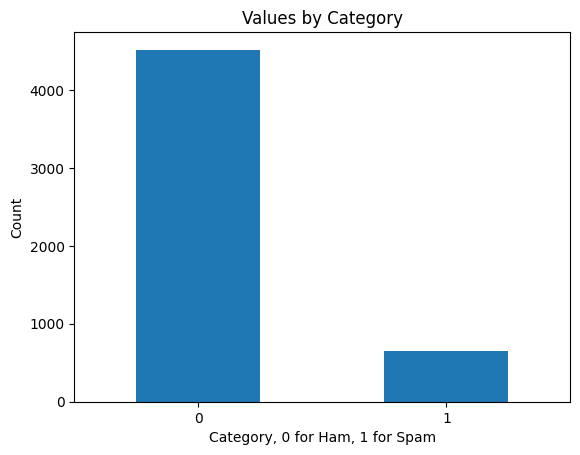

In [164]:
# plot how many messages are ham and how many are spam
df['category'].value_counts().plot(kind='bar')
plt.title('Values by Category')
plt.xlabel('Category, 0 for Ham, 1 for Spam')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## 4.2 Average Message Length by Category

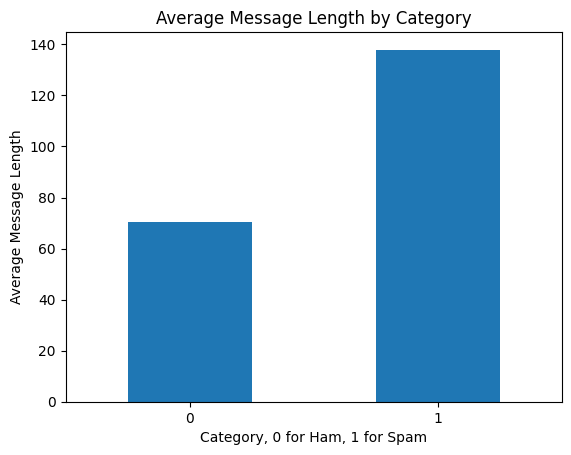

In [165]:
# make a bar plot for average message length by category
df.groupby('category')['message_length'].mean().plot(kind='bar')
plt.title('Average Message Length by Category')
plt.xlabel('Category, 0 for Ham, 1 for Spam')
plt.ylabel('Average Message Length')
plt.xticks(rotation=0)
plt.show()

## 4.3 Average Word Count by Category

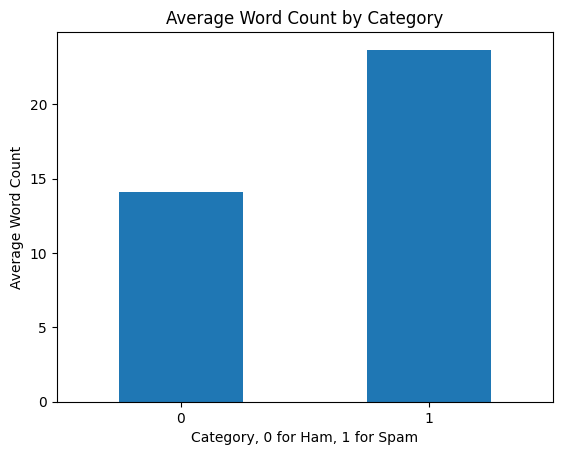

In [166]:
# word Count by Category
df.groupby('category')['word_count'].mean().plot(kind='bar')
plt.title('Average Word Count by Category')
plt.xlabel('Category, 0 for Ham, 1 for Spam')
plt.ylabel('Average Word Count')
plt.xticks(rotation=0)
plt.show()

## 4.4 Has numbers by category

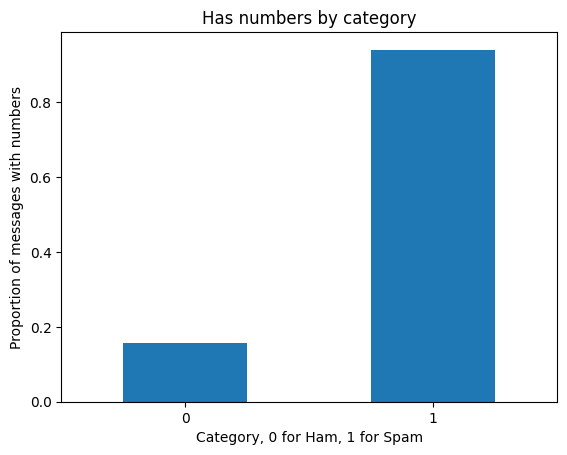

In [167]:
# compare how many messages have numbers by category
df.groupby('category')['has_numbers'].mean().plot(kind='bar')
plt.title('Has numbers by category')
plt.xlabel('Category, 0 for Ham, 1 for Spam')
plt.ylabel('Proportion of messages with numbers')
plt.xticks(rotation=0)
plt.show()

## 4.5 Has link

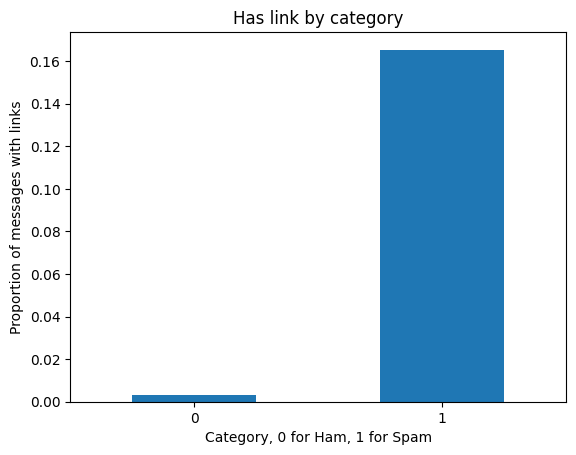

In [168]:
# compare how many message have links by category
df.groupby('category')['has_link'].mean().plot(kind='bar')
plt.title('Has link by category')
plt.xlabel('Category, 0 for Ham, 1 for Spam')
plt.ylabel('Proportion of messages with links')
plt.xticks(rotation=0)
plt.show()

## 4.6 Average count of suspicious words

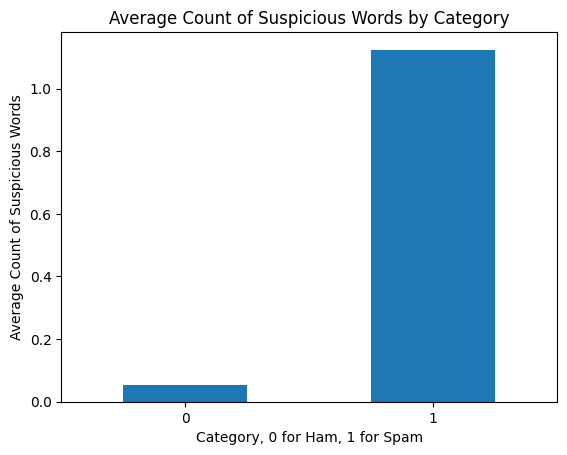

In [169]:
# show on average how many suspicious words are in messages by category
df.groupby('category')['suspicious_word_count'].mean().plot(kind='bar')
plt.title('Average Count of Suspicious Words by Category')
plt.xlabel('Category, 0 for Ham, 1 for Spam')
plt.ylabel('Average Count of Suspicious Words')
plt.xticks(rotation=0)
plt.show()

# 5. Preparing data for model

## 5.1 Select columns for features x and target y

In [170]:
X = df[['message_length', 'word_count', 'has_numbers', 'has_link', 'suspicious_word_count']]
y = df['category']

## 5.2 Split data for training and test

In [171]:
# split data for training and testing
# stratify to maintain the proportion of classes in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## 5.3 Scale features to be fair

In [172]:
# scale features with standard scaler so one unit in feature is one standard deviation
# especially important for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Training Models

## 6.1 Logistic Regression from Scratch

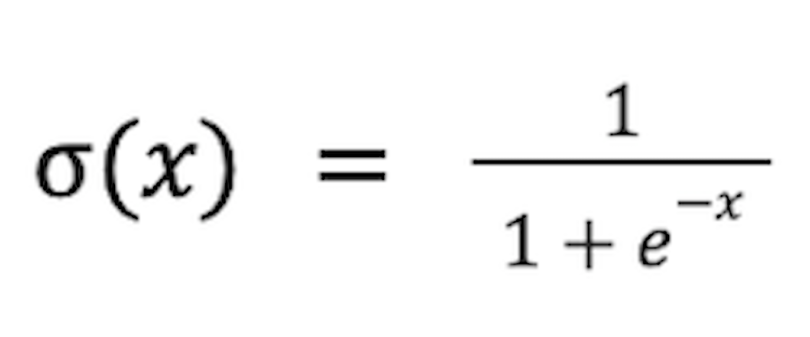



In [173]:
# w is weights, b is bias
# initialize weights and bias to zeros using numpy
# using 5 features (our 5 columns we feature engineered) to train the model
w, b = np.zeros(5), 0

for _ in range(1000):
    # calculate predictions using sigmoid function
    # 1 divided by 1 plus e to the negative (dot product of X and weights plus bias)
    p = 1 / (1 + np.exp(-(X_train_scaled @ w + b)))
    # update weights
    # w = w - learning_rate * (X.T @ (p - y)) / m
    # here learning rate is 0.01 and m is len(y_train)
    # @ operator is used for dot product
    w -= 0.01 * (X_train_scaled.T @ (p - y_train)) / len(y_train)
    # update bias
    # b = b - learning_rate * sum of (p - y) / m
    # here learning rate is 0.01 and m is len(y_train)
    # sum of (p - y) is the sum of the differences between predictions and actual labels
    # this gives us the overall error
    b -= 0.01 * np.sum(p - y_train) / len(y_train)

# make predictions using @ operator for dot product
# apply sigmoid and threshold at 0.5
y_pred = (1 / (1 + np.exp(-(X_test_scaled @ w + b))) >= 0.5).astype(int)

print("Metrics for Logistic Regression from Scratch model:")

# check accuracy
lrs_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {lrs_accuracy:10.2f}")

# check recall
lrs_recall = recall_score(y_test, y_pred)
print(f"Recall: {lrs_recall:12.2f}")

# check precision
lrs_precision = precision_score(y_test, y_pred)
print(f"Precision: {lrs_precision:9.2f}")

# check f1 score
lrs_f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {lrs_f1:10.2f}")

# check confusion matrix
lrs_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(lrs_cm)

Metrics for Logistic Regression from Scratch model:
Accuracy:       0.94
Recall:         0.63
Precision:      0.83
F1 Score:       0.71
Confusion Matrix:
[[886  17]
 [ 49  82]]


## 6.2 Logistic Regression

In [174]:
# create the model for logistic regression
lr_model = LogisticRegression(random_state=42)

# train model
lr_model.fit(X_train_scaled, y_train)

# make predictions
y_pred = lr_model.predict(X_test_scaled)

print("Metrics for Logistic Regression Model:")

# check accuracy
lr_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {lr_accuracy:10.2f}")

# check recall
lr_recall = recall_score(y_test, y_pred)
print(f"Recall: {lr_recall:12.2f}")

# check precision
lr_precision = precision_score(y_test, y_pred)
print(f"Precision: {lr_precision:9.2f}")

# check f1 score
lr_f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {lr_f1:10.2f}")


# check confusion matrix
lr_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(lr_cm)

Metrics for Logistic Regression Model:
Accuracy:       0.95
Recall:         0.69
Precision:      0.89
F1 Score:       0.78
Confusion Matrix:
[[892  11]
 [ 40  91]]


# 6. Evaluate Model

# 7. Improve Model